<a href="https://colab.research.google.com/github/shrnkm/ColorCompanion/blob/master/Python/CC_inCells.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# ------------------------------------------------------------------------------
# set the colors dictionary
# ------------------------------------------------------------------------------
color_dic = {0: ['boring green','#63b365'],
             1: ['cyan','#00ffff'],
             2: ['yellow','#ffff14'],
             3: ['lime green','#89fe05'],
             4: ['hot pink','#ff028d'],
             5: ['cornflower','#6a79f7'],
             6: ['white','#ffffff'],
             7: ['neon blue','#04d9ff'],
             8: ['bright teal','#01f9c6'],
             9: ['purpley blue','#5f34e7'],
             10:['balck','#000000'],
             11:['darker purple','#5f1b6b'],
             12:['very light purple','#f6cefc'],
             13:['light yellow green','#ccfd7f'],
             14:['cool grey','#95a3a6'],
             15:['fluro green','#0aff02'],
             16:['lipstick red','#c0022f'],
             17:['lawn green','#4da409'],
             18:['darkblue','#030764'],
             19:['sand yellow','#fce166'],
             20:['golden rod','#f9bc08'],
             21:['neon red','#ff073a'],
             22:['vivid purple','#9900fa'],
             23:['orange pink','#ff6f52'],
             24:['desert','#ccad60']}


In [0]:
# ------------------------------------------------------------------------------
# initialize the adjectives dictionary
# ------------------------------------------------------------------------------
adj_dict = {'warm'  : np.array([1,0,0]),
            'red'   : np.array([1,0,0]),
            'blue'  : np.array([0,0,1]),
            'green' : np.array([0,1,0]),
            'yellow': np.array([.5,.5,0]),
            'cold'  : np.array([-.5,0,.5]),
            'bright': np.array([.3,.3,.3]),
            'pale'  : np.array([-.3,-.3,-.3],
            'light' : np.array([-.5,-.5,-.5])}


In [0]:
# ------------------------------------------------------------------------------
# initialize the adverbs dictionary
# ------------------------------------------------------------------------------
adv_dict = {.05:['bit', 'little', 'slightly'],
            .15 :['somewhat', 'somehow'],
            .3 :['lot', 'very', 'much']}

In [0]:
# ------------------------------------------------------------------------------
# ask for the name of the user and welcome them
# ------------------------------------------------------------------------------
# ask and receive the user name
name = input('What\'s your name?\n')
# say hi to them
print('\nHi ,' + name + '!')


What's your name?
Sahar

Hi ,Sahar!


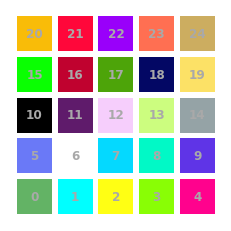

In [0]:
# ---------------------------------------------
# display color for the user to pick the target
# ---------------------------------------------

# set an empty list for the colors in the pool
colors = [None] * len(color_dic)
# number of color patches in each row
blocks = 5
# size of each color patch
size = 3
# space size between each two patches
space = .5

# for each item in the dictionary,
for key,value in color_dic.items():

  # set the position on x-axis
  x = (key % blocks) * (size + space)
  # set the position on y-axis
  y = (key // blocks) * (size + space)

  # creat a color patch
  colors[key] = plt.Rectangle((x, y), size, size, fc=value[1])
  # attach the patch to the plot axes
  plt.gca().add_patch(colors[key])
  
  # get the coordinates of the upper left corner of each patch
  rx, ry = colors[key].get_xy()
  # use that coordinates to spot the center of the same patch
  cx = rx + size/2
  cy = ry + size/2

  # and display a numerical index at the center of that patch
  plt.annotate(key, (cx, cy), color='darkgrey', weight='bold', 
                fontsize=12, ha='center', va='center')

# plot the colors
plt.axis('scaled')
# while turning the axes off
plt.axis('off')
plt.show()


In [0]:
# -------------------------------------------------
# ask the user to pick a color from the dictionary
# -------------------------------------------------
# set a condition for starting the loop
answer = False
# process the user's answer
while not answer:
  target = input('Please pick up the target color by entering its number:\n')
  try:
    # check if the answer is a number in alphabet
    val = int(target)
    # check if the answer is a number in the range
    if not (val in range(len(color_dic))):
      print('Not in the available range!\n')
    else:
      # set the exit condition for getting out of the loop
      answer = True
  except:
    print('Not even a number!\n')

# take the index and extract the hex code for the target color
target_hex = color_dic[val][1]

# convert and store the RGB code for the target color, as well
target = tuple(int(target_hex.lstrip('#')[i:i+2], 16)/255 for i in (0, 2, 4))


Please pick up the target color by entering its number:
12


In [0]:
# ------------------------------------------------------------------------------
# ask the user to pick a proper primary color as the start color
# ------------------------------------------------------------------------------
# ask the question; not receiving any input yet
print('Okay, let\'s start with the primary colors (red, gree, blue);\n'+
      'which one is closer to your color, ' + name +'?\n')

Okay, let's start with the primary colors (red, gree, blue);
which one is closer to your color, Sahar?



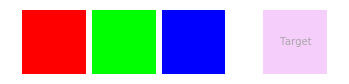

In [0]:
# ------------------------------------------------------------------------------
# display the primary colors and the target color
# ------------------------------------------------------------------------------
# creat red color patch
red = plt.Rectangle((0, 0), 5, 5, fc=(1,0,0))
# attach the patch to the plot axes
plt.gca().add_patch(red)
# creat green color patch
green = plt.Rectangle((5.5, 0), 5, 5, fc=(0,1,0))
# attach the patch to the plot axes
plt.gca().add_patch(green)
# creat blue color patch
blue = plt.Rectangle((11, 0), 5, 5, fc=(0,0,1))
# attach the patch to the plot axes
plt.gca().add_patch(blue)
# creat the target color patch
target_patch = plt.Rectangle((19, 0), 5, 5, fc=target_hex)
# attach the patch to the plot axes
plt.gca().add_patch(target_patch)
plt.annotate('Target', (21.5, 2.5), color='darkgrey', 
                fontsize=10, ha='center', va='center')
plt.axis('scaled')
plt.axis('off')
plt.show()

In [0]:
# ------------------------------------------------------------------------------
# process and record the user's answer as the start color
# ------------------------------------------------------------------------------
# ask the question and record the answer
start = input('Please type the color name:\n')
# check whether the answer is valid
while not start.lower() in ['red', 'green', 'blue']:
  # repeat the answer in case of receiving not a valid answer
  start = input('You should type either \'red\', \'green\' or \'blue\':\n')
# lowercase the start color string
start = start.lower()
# set the state color (in RGB)
if start == 'red':
  state = np.array([1,0,0])
elif start == 'green':
  state = np.array([0,1,0])
else:
  state = np.array([0,0,1])


Please type the color name:
red


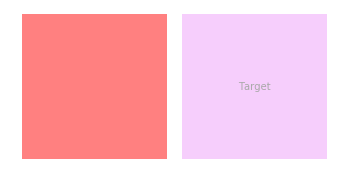

Now, comparing with the target color,
how do you describe your color?
colder


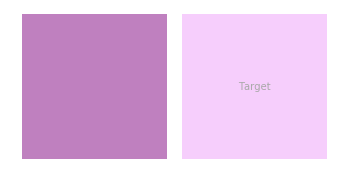

Now, comparing with the target color,
how do you describe your color?
more blue


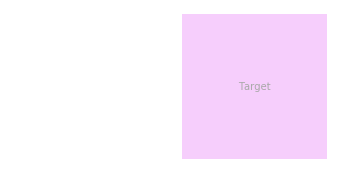

Now, comparing with the target color,
how do you describe your color?
something


In [0]:
# ----------------------- for test ---------------------------------------------
counter = 0
# ----------------------- for test ---------------------------------------------

# ------------------------------------------------------------------------------
# THE GAME
# ------------------------------------------------------------------------------
# repeat until the state color is the same as the target color
while not (state == np.array(target)).all():

# ------------------------------------------------------------------------------
# display the state color and the target color
# ------------------------------------------------------------------------------
  # create the state_patch
  state_patch = plt.Rectangle((0, 0), 5, 5, fc=tuple(state))
  # attach the patch to the plot axes
  plt.gca().add_patch(state_patch)
  # creat the target color patch
  target_patch = plt.Rectangle((5.5, 0), 5, 5, fc=target_hex)
  # attach the patch to the plot axes
  plt.gca().add_patch(target_patch)
  # write the term 'target' on the target patch
  plt.annotate('Target', (8, 2.5), color='darkgrey',
                fontsize=10, ha='center', va='center')

  plt.axis('scaled')
  plt.axis('off')
  plt.show()

# ------------------------------------------------------------------------------
# ask user to compare the target color with the state color
# ------------------------------------------------------------------------------
  # ask the question
  print('Now, comparing with the current state color,')
  # get the answer
  description = input('how do you describe the target color?\n')

# ------------------------------------------------------------------------------
# analyze the expression
# ------------------------------------------------------------------------------
  # set the default adjective and adverb
  adj = 1
  adv = .5
  
  # convert the description to lowercase
  description = description.lower()

  # iterate over the adj dictionary
  for key, value in adj_dict.items():
    if key in description:
      adj = value
      break
  
  # iterate over the adv dictionary
  for key, value in adv_dict.items():
    for item in value:
      if item in description:
        adv = key
        break


# ------------------------------------------------------------------------------
# cahnge the state color
# ------------------------------------------------------------------------------
  # change the color based on adverb and adjective
  state = state + (adj * adv)
  # make sure the components remain in range [0,1]
  state = np.clip(state, 0, 1)





# ----------------------- for test ---------------------------------------------
  counter += 1
  if counter == 3:
    break
# ----------------------- for test ---------------------------------------------